# Introdução

# Resumo

# Bibliotecas e Configurações

In [1]:
import pandas as pd
from  zipfile import ZipFile
import seaborn as sns
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
from IPython.core.display import display, HTML, Markdown
import numpy as np
from statsmodels.stats.weightstats import zconfint
from statsmodels.stats.weightstats import DescrStatsW
from statsmodels.stats.weightstats import ztest
from scipy.stats import normaltest
from scipy.stats import ranksums

In [2]:
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)
display(HTML("<style>.container { width:99% !important; }</style>"))

# Importação dos dados

In [3]:
path = 'Dados desafio 3.zip'

In [4]:
zip= ZipFile(path)
dados = pd.read_csv(zip.open(zip.namelist()[1]), sep = ";", thousands=".", decimal=",")

## Exploração inicial dos dados

In [7]:
dados

,ANOPESQ,PAIS,REGEOGR,UFCENSO,MUNICIPIO_CAP,TIPO_MUNIC,VB00004,VB01001,VB01002,VB01003,...,VB16001A05,VB16001A06,VB16001A07,VB16001A08,ESTRATO_EXP,ESTRATOGEOREG,PESO,aluno,escola,turma
0,2015,76,1,11,1100205,1,1,2,1,14,...,2,2,2,2,110020521,1100205,3.738463,1,1,1787
1,2015,76,1,11,1100205,1,1,1,4,16,...,2,2,2,2,110020521,1100205,3.738463,2,1,1787
2,2015,76,1,11,1100205,1,1,1,1,13,...,2,2,2,2,110020521,1100205,3.738463,3,1,1787
3,2015,76,1,11,1100205,1,1,1,4,14,...,1,2,2,2,110020521,1100205,3.738463,4,1,1787
4,2015,76,1,11,1100205,1,1,1,1,14,...,2,1,2,2,110020521,1100205,3.738463,5,1,1787
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102067,2015,76,5,53,5300108,1,1,2,1,14,...,2,2,1,2,530010821,5300108,16.873376,102068,3040,1883
102068,2015,76,5,53,5300108,1,1,2,4,14,...,2,2,1,2,530010821,5300108,16.873376,102069,3040,1883
102069,2015,76,5,53,5300108,1,1,2,4,14,...,1,2,2,2,530010821,5300108,16.873376,102070,3040,1883
102070,2015,76,5,53,5300108,1,1,1,4,15,...,1,2,2,2,530010821,5300108,16.873376,102071,3040,1883


In [14]:
dados.select_dtypes(include='object')

""
0
1
2
3
4
...
102067
102068
102069
102070


In [22]:
round((dados.notna().sum()/(dados.notna().sum() + dados.isna().sum()))*100,2)

ANOPESQ          100.0
PAIS             100.0
REGEOGR          100.0
UFCENSO          100.0
MUNICIPIO_CAP    100.0
                 ...  
ESTRATOGEOREG    100.0
PESO             100.0
aluno            100.0
escola           100.0
turma            100.0
Length: 174, dtype: float64

# Funções

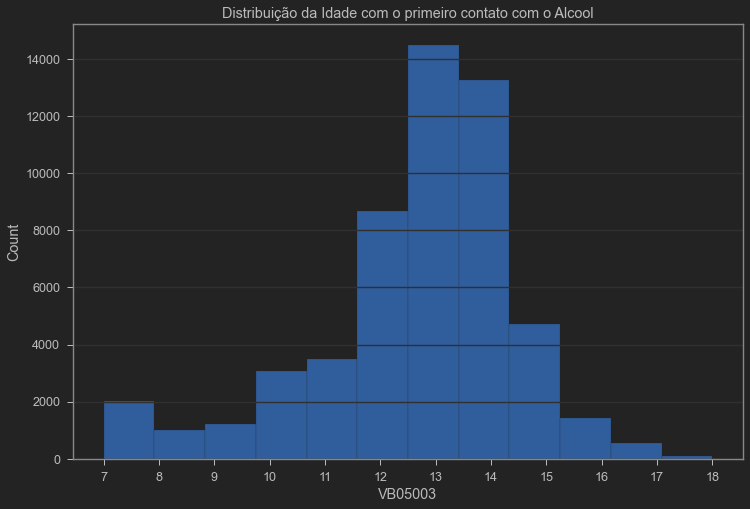

In [59]:
plt.figure(figsize=(12,8))
plt.title('Distribuição da Idade com o primeiro contato com o Alcool')
sns.histplot(dados['VB05003'][dados['VB05003']!=99][dados['VB05003']!=1],bins=12,kde=False,color='b')
plt.xticks(ticks=[7,8,9,10,11,12,13,14,15,16,17,18])
plt.grid(axis='y')
plt.show()